# EDA

In [1]:
import numpy as np
import pandas as pd

## 1. Loading Data

In [2]:
columns = [
    "C", "Si", "Mn", "S", "P", "Ni", "Cr", "Mo", "V", "Cu", "Co", "W",
    "O", "Ti", "N", "Al", "B", "Nb", "Sn", "As", "Sb",
    "Current", "Voltage", "AC_DC", "ElectrodePolarity", "HeatInput",
    "InterpassTemp", "WeldType", "PWHT_Temp", "PWHT_Time",
    "YieldStrength", "UTS", "Elongation", "ReductionArea",
    "CharpyTemp", "CharpyImpact", "Hardness", "FATT50", "PrimaryFerrite",
    "Ferrite2ndPhase", "AcicularFerrite", "Martensite", "FerriteCarbide",
    "WeldID"
]

In [3]:
df = pd.read_csv("../data/welddb.data", delim_whitespace=True, names=columns, na_values='N')
df.head()

/var/folders/5l/rft89vf91_sc94km3w2pwq400000gn/T/ipykernel_39082/3652121480.py:1: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv("../data/welddb.data", delim_whitespace=True, names=columns, na_values='N')


,C,Si,Mn,S,P,Ni,Cr,Mo,V,Cu,...,CharpyTemp,CharpyImpact,Hardness,FATT50,PrimaryFerrite,Ferrite2ndPhase,AcicularFerrite,Martensite,FerriteCarbide,WeldID
0,0.037,0.30,0.65,0.008,0.012,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Evans-Ni/CMn-1990/1991-0Aaw
1,0.037,0.30,0.65,0.008,0.012,0.0,NaN,NaN,NaN,NaN,...,-28.0,100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Evans-Ni/CMn-1990/1991-0Aawch
2,0.037,0.30,0.65,0.008,0.012,0.0,NaN,NaN,NaN,NaN,...,-38.0,100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Evans-Ni/CMn-1990/1991-0Aht
3,0.037,0.31,1.03,0.007,0.014,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Evans-Ni/CMn-1990/1991-0Baw
4,0.037,0.31,1.03,0.007,0.014,0.0,NaN,NaN,NaN,NaN,...,-48.0,100.0,NaN,NaN,32,28.0,40.0,0.0,0.0,Evans-Ni/CMn-1990/1991-0Bawch


### Dataset analysis

#### What percent of each column is null?

In [4]:
missing_percentage = df.isnull().mean() * 100
missing_percentage = missing_percentage.sort_values(ascending=False).round(2)
pd.DataFrame({'Missing elements percentage': missing_percentage})

,Missing elements percentage
FATT50,98.12
W,95.46
FerriteCarbide,94.61
Martensite,94.61
Ferrite2ndPhase,94.55
AcicularFerrite,94.55
PrimaryFerrite,94.07
Co,92.19
Hardness,91.65
As,85.84


In [5]:
# Normalize and replace specific WeldType values (ignore surrounding whitespace)
if 'WeldType' not in df.columns:
    print("Column 'WeldType' not found in dataframe 'df'.")
else:
    # create a stripped string version for comparisons (preserves original values in df until replacement)
    s_strip = df['WeldType'].astype(str).str.strip()
    # masks for exact matches after stripping
    mask_shma = df['WeldType'].notna() & s_strip.eq('ShMA')
    mask_sma  = df['WeldType'].notna() & s_strip.eq('SMA')
    n_shma = int(mask_shma.sum())
    n_sma  = int(mask_sma.sum())
    if n_shma == 0 and n_sma == 0:
        print("No occurrences of 'ShMA' or 'SMA' found in 'WeldType'.")
    else:
        # Report what we'll replace
        if n_shma > 0:
            print(f"Replacing {n_shma} occurrences of 'ShMA' -> 'MMA' in column 'WeldType'.")
        if n_sma > 0:
            print(f"Replacing {n_sma} occurrences of 'SMA' -> 'SA' in column 'WeldType'.")
        # prepare sample indices to preview (up to 10 total)
        idx_shma = df.loc[mask_shma].index.tolist()
        idx_sma  = df.loc[mask_sma].index.tolist()
        sample_idx = (idx_shma + idx_sma)[:10]
        # capture before values for preview
        sample_before = df.loc[sample_idx, ['WeldType']].copy().reset_index(drop=True).rename(columns={'WeldType':'before'})
        # perform replacements in-place
        df.loc[mask_shma, 'WeldType'] = 'MMA'
        df.loc[mask_sma,  'WeldType'] = 'SA'
        # capture after values for preview
        sample_after = df.loc[sample_idx, ['WeldType']].copy().reset_index(drop=True).rename(columns={'WeldType':'after'})
        # determine change type per sampled row
        before_stripped = sample_before['before'].astype(str).str.strip()
        change = before_stripped.replace({'ShMA':'ShMA -> MMA', 'SMA':'SMA -> SA'})
        preview = pd.concat([sample_before, sample_after], axis=1)
        preview['change'] = change
        from IPython.display import display
        display(preview)
    # After replacements (or if none), show value counts and unique values for WeldType
    print('\nWeldType value counts (excluding NaN):')
    display(df['WeldType'].dropna().astype(str).str.strip().value_counts())
    print(f"NaN count: {int(df['WeldType'].isna().sum())}")
    print('\nUnique WeldType values (sorted):')
    uniques = sorted(df['WeldType'].dropna().astype(str).str.strip().unique())
    display(uniques)

Replacing 40 occurrences of 'ShMA' -> 'MMA' in column 'WeldType'.


,before,after,change
0,ShMA,MMA,ShMA -> MMA
1,ShMA,MMA,ShMA -> MMA
2,ShMA,MMA,ShMA -> MMA
3,ShMA,MMA,ShMA -> MMA
4,ShMA,MMA,ShMA -> MMA
5,ShMA,MMA,ShMA -> MMA
6,ShMA,MMA,ShMA -> MMA
7,ShMA,MMA,ShMA -> MMA
8,ShMA,MMA,ShMA -> MMA
9,ShMA,MMA,ShMA -> MMA



WeldType value counts (excluding NaN):


WeldType
MMA      1180
SA        261
FCA        87
TSA        87
NGSAW      18
NGGMA       7
SAA         4
GTAA        4
GMAA        4
Name: count, dtype: int64

NaN count: 0

Unique WeldType values (sorted):


['FCA', 'GMAA', 'GTAA', 'MMA', 'NGGMA', 'NGSAW', 'SA', 'SAA', 'TSA']

## 2. Preprocessing
### Handling outliers
To find outliers, we remove them using the IQR rule:  
If value $< Q1 - 1.5 \times IQR$ or value $> Q3 + 1.5 \times IQR$ :  
    &nbsp;&nbsp;&nbsp;&nbsp;replace it with NaN (because we'll handle missing values next).

In [6]:
# Remove outliers per numeric column using the IQR rule, computed within each WeldType group
# Group by WeldType and apply the same IQR filtering per group
if 'WeldType' not in df.columns:
    print("Column 'WeldType' not found in dataframe 'df'.")
else:
    # select numeric columns and exclude identifiers
    numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
    if 'WeldID' in numeric_cols:
        numeric_cols.remove('WeldID')
    # prepare containers for reporting and previews
    outlier_records = []  # list of dicts: {'WeldType', 'column', 'outliers_replaced'}
    previews = []  # list of small DataFrames showing before/after for samples
    # canonical WeldType strings (strip whitespace)
    weld_series = df['WeldType'].astype(str).str.strip()
    # iterate groups
    for wtype, group in df.groupby(weld_series):
        # skip groups where weldtype is 'nan' string produced from NaN original
        if wtype.lower() in ('nan', 'none', ''):
            continue
        for col in numeric_cols:
            series = group[col].dropna()
            if series.empty:
                outlier_records.append({'WeldType': wtype, 'column': col, 'outliers_replaced': 0})
                continue
            q1 = series.quantile(0.25)
            q3 = series.quantile(0.75)
            iqr = q3 - q1
            if iqr == 0 or pd.isna(iqr):
                outlier_records.append({'WeldType': wtype, 'column': col, 'outliers_replaced': 0})
                continue
            lower = q1 - 1.5 * iqr
            upper = q3 + 1.5 * iqr
            # mask applied to the full df so we replace in-place
            mask = (weld_series == wtype) & ((df[col] < lower) | (df[col] > upper))
            count = int(mask.sum())
            outlier_records.append({'WeldType': wtype, 'column': col, 'outliers_replaced': count})
            if count > 0:
                # capture a small sample of indices to preview before/after
                sample_idx = df.loc[mask].index[:5]
                sample_before = df.loc[sample_idx, [col, 'WeldType']].copy().reset_index(drop=True).rename(columns={col: 'before'})
                # replace outliers with NaN in the original df
                df.loc[mask, col] = np.nan
                sample_after = df.loc[sample_idx, [col]].copy().reset_index(drop=True).rename(columns={col: 'after'})
                preview = pd.concat([sample_before, sample_after], axis=1)
                preview['column'] = col
                preview['WeldType_group'] = wtype
                previews.append(preview)
    # build a multi-indexed report DataFrame
    outlier_report = pd.DataFrame(outlier_records)
    if not outlier_report.empty:
        outlier_report = outlier_report.set_index(['WeldType', 'column']).sort_values('outliers_replaced', ascending=False)
        print('Outlier replacements by WeldType and column:')
        display(outlier_report)
    else:
        print('No numeric columns or no groups found to analyze.')
    # display preview examples (before/after)
    if previews:
        previews_df = pd.concat(previews, ignore_index=True)
        print('\nPreview of changed values (first 50):')
        display(previews_df.head(50))
    else:
        print('No outlier replacements were performed (no previews to show).')

Outlier replacements by WeldType and column:


outliers_replaced
WeldType column                            
MMA      Si                             166
         Voltage                        111
         Cr                              99
         C                               88
         O                               79
...                                     ...
         PWHT_Time                        0
         FATT50                           0
         AcicularFerrite                  0
         Martensite                       0
TSA      FerriteCarbide                   0

[207 rows x 1 columns]


Preview of changed values (first 50):


,before,WeldType,after,column,WeldType_group
0,1.680,FCA,NaN,Mn,FCA
1,1.740,FCA,NaN,Mn,FCA
2,0.010,FCA,NaN,P,FCA
3,0.011,FCA,NaN,P,FCA
4,0.011,FCA,NaN,P,FCA
5,0.009,FCA,NaN,P,FCA
6,0.011,FCA,NaN,P,FCA
7,0.030,FCA,NaN,Ni,FCA
8,0.030,FCA,NaN,Ni,FCA
9,0.550,FCA,NaN,Ni,FCA


In [7]:
# Print number of rows in the dataset
print(f"Number of rows: {len(df)}")

Number of rows: 1652


/var/folders/5l/rft89vf91_sc94km3w2pwq400000gn/T/ipykernel_39082/1542861026.py:5: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df_orig = pd.read_csv("../data/welddb.data", delim_whitespace=True, names=columns, na_values='N')


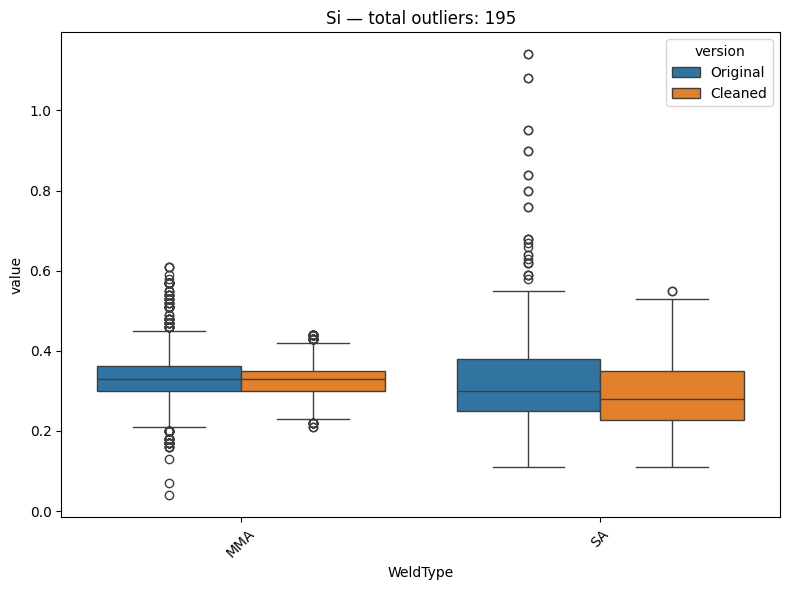

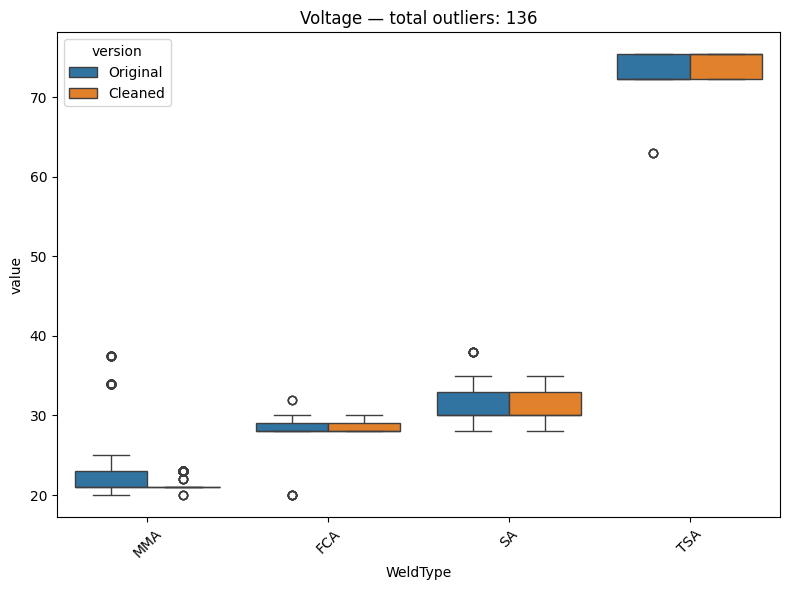

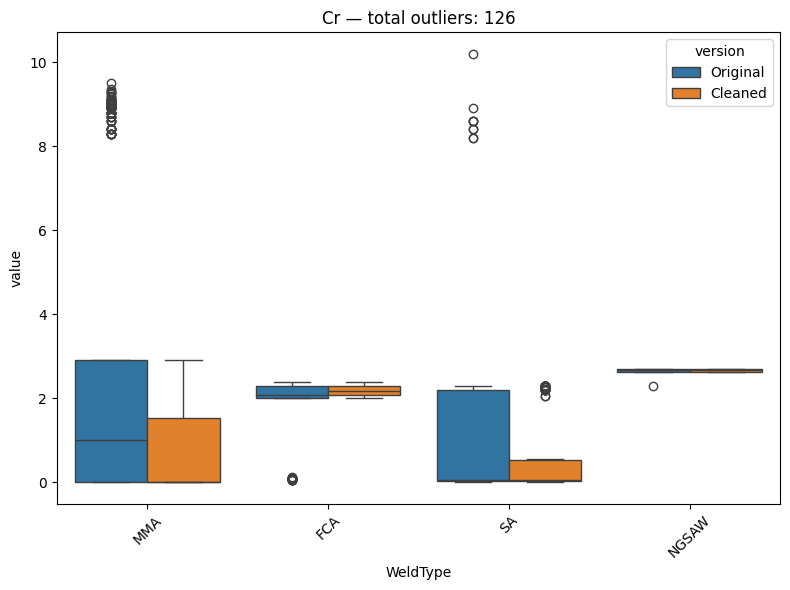

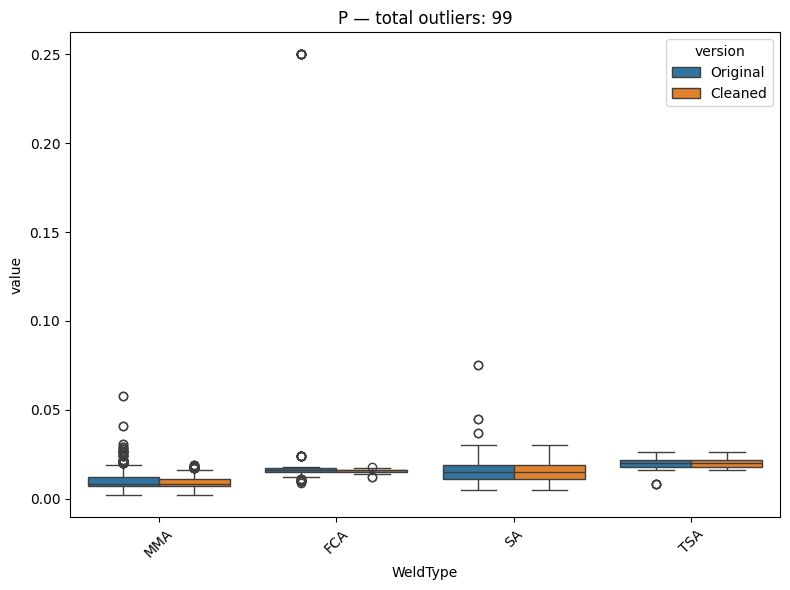

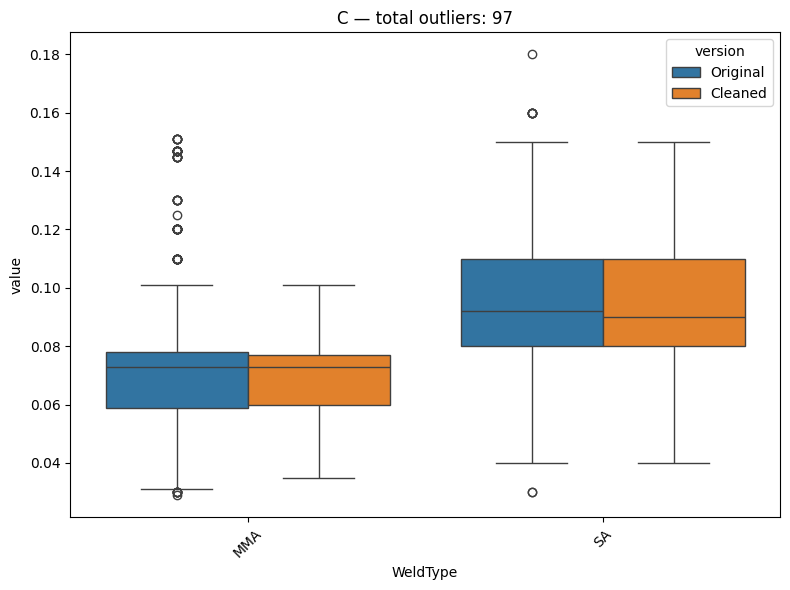

In [8]:
# Visualize pre/post distributions per WeldType for columns with group-wise outliers
import matplotlib.pyplot as plt
import seaborn as sns
# reload original data to preserve pre-clean values
df_orig = pd.read_csv("../data/welddb.data", delim_whitespace=True, names=columns, na_values='N')
# Ensure group-wise outlier_report exists; if not, try to compute it similarly to the cleaning step
if 'outlier_report' not in globals() or not isinstance(outlier_report, pd.DataFrame) or ('WeldType' not in getattr(outlier_report.index, 'names', [])):
    # compute a per-(WeldType, column) outlier report using the same grouping logic
    numeric_cols = df_orig.select_dtypes(include=[np.number]).columns.tolist()
    if 'WeldID' in numeric_cols:
        numeric_cols.remove('WeldID')
    records = []
    weld_series = df['WeldType'].astype(str).str.strip() if 'WeldType' in df.columns else df_orig['WeldType'].astype(str).str.strip()
    for wtype, group in df_orig.groupby(weld_series):
        if wtype.lower() in ('nan','none',''):
            continue
        for col in numeric_cols:
            series = group[col].dropna()
            if series.empty:
                records.append({'WeldType': wtype, 'column': col, 'outliers_replaced': 0})
                continue
            q1 = series.quantile(0.25)
            q3 = series.quantile(0.75)
            iqr = q3 - q1
            if iqr == 0 or pd.isna(iqr):
                records.append({'WeldType': wtype, 'column': col, 'outliers_replaced': 0})
                continue
            lower = q1 - 1.5 * iqr
            upper = q3 + 1.5 * iqr
            mask = (weld_series == wtype) & ((df_orig[col] < lower) | (df_orig[col] > upper))
            records.append({'WeldType': wtype, 'column': col, 'outliers_replaced': int(mask.sum())})
    outlier_report = pd.DataFrame(records).set_index(['WeldType','column']).sort_values('outliers_replaced', ascending=False)
# Determine top columns by total outliers across weld types
if outlier_report.empty:
    print('No outlier report available to visualize.')
else:
    total_by_col = outlier_report.reset_index().groupby('column')['outliers_replaced'].sum().sort_values(ascending=False)
    top_n_cols = 5
    top_cols = total_by_col[total_by_col > 0].head(top_n_cols).index.tolist()
    if not top_cols:
        print('No columns with outliers to visualize.')
    else:
        for col in top_cols:
            # for this column, find weld types with most replacements
            per_weld = outlier_report.reset_index().query("column == @col").sort_values('outliers_replaced', ascending=False)
            # pick top K weld types for clarity
            top_w = per_weld[per_weld['outliers_replaced']>0].head(6)['WeldType'].tolist()
            if not top_w:
                continue
            # build a combined DataFrame with Original and Cleaned for only these weld types
            df_o = df_orig.loc[df_orig['WeldType'].astype(str).str.strip().isin(top_w), ['WeldType', col]].copy()
            df_o = df_o.assign(version='Original').rename(columns={col:'value'})
            # cleaned df may have NaNs for replacements
            df_c = df.loc[df['WeldType'].astype(str).str.strip().isin(top_w), ['WeldType', col]].copy()
            df_c = df_c.assign(version='Cleaned').rename(columns={col:'value'})
            plot_df = pd.concat([df_o, df_c], ignore_index=True)
            # ensure WeldType is stripped consistently
            plot_df['WeldType'] = plot_df['WeldType'].astype(str).str.strip()
            plt.figure(figsize=(max(8, len(top_w)*1.2),6))
            sns.boxplot(x='WeldType', y='value', hue='version', data=plot_df, showfliers=True)
            plt.title(f"{col} — total outliers: {int(total_by_col.loc[col])}")
            plt.xticks(rotation=45)
            plt.tight_layout()
            plt.show()

In [9]:
# # Show the entire DataFrame without truncation (use with caution on very large datasets)
# from IPython.display import display
# import pandas as pd
# # Option A: temporarily set pandas display options and display the DataFrame
# with pd.option_context('display.max_rows', None, 'display.max_columns', None, 'display.width', 2000):
#     display(df)
# # Option B: print the entire DataFrame as a string (uncomment to use)
# # print(df.to_string())